In [24]:
import argparse
import os
import numpy as np
import math
import itertools
import datetime
import time
import sys

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

from aae import *
from datasets import *

import torch.nn as nn
import torch.nn.functional as F
import torch

import cv2
import matplotlib.pyplot as plt

In [25]:
def tensor_to_image(x):
    img = np.transpose(x.cpu().numpy(), (1,2,0))
    norm_image = cv2.normalize(img, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    norm_image = norm_image.astype(np.uint8)
    return norm_image

In [8]:
transforms_A = transforms.Compose([
   transforms.Resize(128),
   transforms.ToTensor(),
   transforms.Normalize(
       mean=[0.5, 0.5, 0.5],
       std=[0.5, 0.5, 0.5]
   )
])

In [9]:
dataloader = DataLoader(
    ImageDataset("../../data/unet_segmentations_binary/", "train", transforms_A),
    batch_size=32,
    shuffle=True,
)

In [18]:
for i, imgs in enumerate(dataloader):
    print(imgs.shape)
    break

torch.Size([32, 3, 128, 128])


In [15]:
dataloader

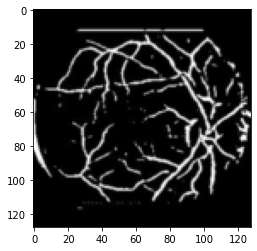

In [32]:
plt.imshow(tensor_to_image(imgs[30]))